<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Develop_LSTM_Models_For_Univariate_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 30784.5938
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 29908.5312
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 28912.5840
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 27798.4668
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 26712.5449
Epoch 6/300
1/1 [==============================] - 0s 1ms/step - loss: 25793.2910
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 24959.6152
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 24075.6387
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 23141.2207
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 22181.6387
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 21218.7207
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 20258.8652
Epoch 13/300


In [20]:
import numpy as np

# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.1701]
1 day input [196.         210.         223.17010498]
1 day output [[234.36359]]
2 day input [210.         223.17010498 234.36358643]
2 day output [[247.94353]]
3 day input [223.1701  234.36359 247.94353]
3 day output [[260.86096]]
4 day input [234.36359 247.94353 260.86096]
4 day output [[273.6721]]
5 day input [247.94353 260.86096 273.6721 ]
5 day output [[287.6856]]
6 day input [260.86096 273.6721  287.6856 ]
6 day output [[301.59024]]
7 day input [273.6721  287.6856  301.59024]
7 day output [[315.9638]]
8 day input [287.6856  301.59024 315.9638 ]
8 day output [[331.12604]]
9 day input [301.59024 315.9638  331.12604]
9 day output [[346.5979]]
[223.1701, 234.36359, 247.94353, 260.86096, 273.6721, 287.6856, 301.59024, 315.9638, 331.12604, 346.5979]


In [21]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [22]:
len(timeseries_data)

9

In [23]:
lst_output

[223.1701,
 234.36359,
 247.94353,
 260.86096,
 273.6721,
 287.6856,
 301.59024,
 315.9638,
 331.12604,
 346.5979]

In [25]:
import matplotlib.pyplot as plt

In [26]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

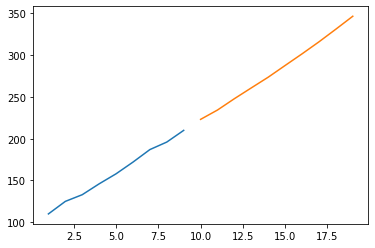

In [27]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)